In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
import os
import datasets
import tsa

In [145]:
# ts = datasets.passengers()
reload(tsa)

print ts.ewm(com = 1, adjust = False).mean().head()
print tsa.ewma(ts.values[:5], alpha = 0.5)

1949-01    112.000
1949-02    115.000
1949-03    123.500
1949-04    126.250
1949-05    123.625
Freq: M, dtype: float64
[ 112.     115.     123.5    126.25   123.625]


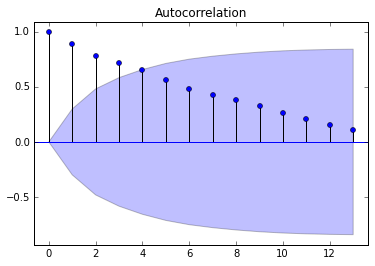

In [248]:
sm.graphics.tsa.plot_acf(df.Activity.values, lags = 13)
plt.show()

In [217]:
ts = datasets.passengers()
parts = sm.tsa.seasonal_decompose(ts.values, model = 'multiplicative', freq = 12)
acf = sm.tsa.acf(ts, nlags = 100)

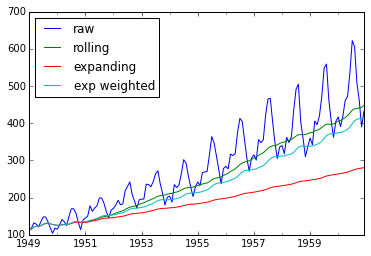

In [57]:
ts.plot(label = 'raw')
ts.rolling(25).mean().plot(label = 'rolling')
ts.expanding().mean().plot(label = 'expanding')
ts.ewm(com = 25).mean().plot(label = 'exp weighted')
plt.legend(loc ='upper left')
plt.show()

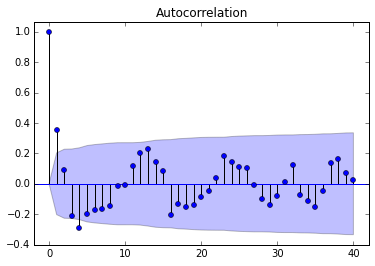

In [224]:
sm.graphics.tsa.plot_acf(parts.resid[7 : 100], lags = 40)
plt.show()

In [19]:
fit = sm.tsa.AR(ts).fit(3)
print fit.params
print fit.aic, fit.bic, fit.hqic

const    16.944345
L1.y      1.301721
L2.y     -0.509949
L3.y     -0.130250
dtype: float64
5.63580397958 5.69664687341 5.66013716178


In [61]:
fit = sm.tsa.ARMA(ts, (3, 3)).fit()
print fit.params
print fit.aic, fit.bic, fit.hqic

const      48.865608
ar.L1.y     2.546062
ar.L2.y    -2.441383
ar.L3.y     0.869939
ma.L1.y    -1.411675
ma.L2.y     0.431192
ma.L3.y     0.159175
dtype: float64
2575.6956449 2605.56237512 2587.63642059


In [164]:
ts.index.month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8])

In [315]:
seasons = ts.groupby(ts.index.month)
seasons.mean()

1     241.750000
2     235.000000
3     270.166667
4     267.083333
5     271.833333
6     311.666667
7     351.333333
8     351.083333
9     302.416667
10    266.583333
11    232.833333
12    261.833333
dtype: float64